In [ ]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

In [ ]:
from scipy .stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

import data and read

In [ ]:
merged_data = pd.read_excel('QVI_transaction_data.xlsx', parse_dates = ['DATE'])

In [ ]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PREMIUM CUSTOMER,LIFESTAGE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Premium,YOUNG SINGLES/COUPLES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Budget,MIDAGE SINGLES/COUPLES
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Budget,MIDAGE SINGLES/COUPLES
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Budget,MIDAGE SINGLES/COUPLES
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Budget,MIDAGE SINGLES/COUPLES


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   PREMIUM CUSTOMER  264836 non-null  object        
 9   LIFESTAGE         264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [ ]:
len(merged_data)

264836

In [ ]:
merged_data['TXN_ID'].nunique()

263127

TXN_ID is not unique to each row. due to there bein sales of chips with different brands in a singl transaction

In [ ]:
##look for duplicate TXN_ID
merged_data[merged_data.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PREMIUM CUSTOMER,LIFESTAGE
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6,Budget,MIDAGE SINGLES/COUPLES
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4,Budget,MIDAGE SINGLES/COUPLES
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,Budget,MIDAGE SINGLES/COUPLES
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7,Budget,MIDAGE SINGLES/COUPLES
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,Budget,MIDAGE SINGLES/COUPLES


In [ ]:
## select any duplicated TXN_ID 

merged_data.loc[merged_data['TXN_ID'] == 7739, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PREMIUM CUSTOMER,LIFESTAGE
376,2019-01-10,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8,Budget,MIDAGE SINGLES/COUPLES
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4,Budget,MIDAGE SINGLES/COUPLES


In [ ]:
## exploring features in dataset

list(merged_data.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES',
 'PREMIUM CUSTOMER',
 'LIFESTAGE']

In [ ]:
merged_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [ ]:
##product name

merged_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [ ]:
##extract the weights from product name

merged_data['SIZE'] = merged_data['PROD_NAME'].str.extract("(\d+)")
merged_data['SIZE'] = pd.to_numeric(merged_data['SIZE'])
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PREMIUM CUSTOMER,LIFESTAGE,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Premium,YOUNG SINGLES/COUPLES,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,Budget,MIDAGE SINGLES/COUPLES,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Budget,MIDAGE SINGLES/COUPLES,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Budget,MIDAGE SINGLES/COUPLES,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Budget,MIDAGE SINGLES/COUPLES,150


In [ ]:
# Create text cleaning function for PROD_NAME feature
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to PROD_NAME column
merged_data['PROD_NAME'] = merged_data['PROD_NAME'].apply(clean_text)

In [ ]:
# Create one giant string and apply 'word_tokenize' to separate the words

cleanProdName = merged_data['PROD_NAME']
string = ''.join(cleanProdName)
prodWord = word_tokenize(string)


In [ ]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe

wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [ ]:
# Let's see the top 5 most frequent words

freq_df.head()

,Word,Frequency
10,Chips,49770
16,Kettle,40739
7,Smiths,28572
6,Cheese,27890
66,Pringles,24743


In [ ]:
# Drop rows with salsa word in PROD_NAME

merged_data['PROD_NAME'] = merged_data['PROD_NAME'].apply(lambda x: x.lower())
merged_data = merged_data[~merged_data['PROD_NAME'].str.contains("salsa")]
merged_data['PROD_NAME'] = merged_data['PROD_NAME'].apply(lambda x: x.title())

In [ ]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PREMIUM CUSTOMER,LIFESTAGE,SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,Premium,YOUNG SINGLES/COUPLES,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,Budget,MIDAGE SINGLES/COUPLES,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Budget,MIDAGE SINGLES/COUPLES,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,Budget,MIDAGE SINGLES/COUPLES,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,Budget,MIDAGE SINGLES/COUPLES,150


In [ ]:
## examine the number of transactions over time to check for missing data or any other data issues

merged_data['DATE'].nunique()

364

In [ ]:
# missing date?

pd.date_range(start= '2018-07-01', end = '2019-06-30').difference(merged_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

yes....on christmas day. stores are mostly closed 

In [ ]:
##create a new dataframe which contains the total sale for each date

a = pd.pivot_table(merged_data, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [ ]:
c = a + b
c.fillna(0, inplace = True)

In [ ]:
c.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head() 

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
# Dates
import datetime
from matplotlib.dates import DateFormatter

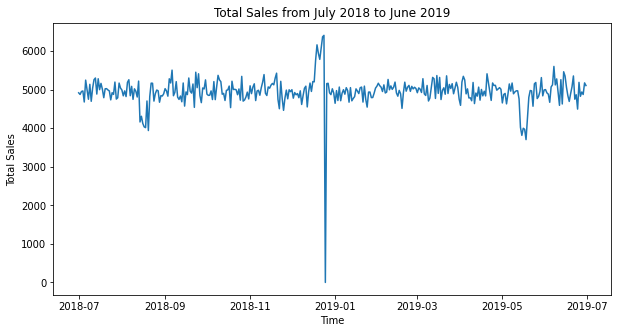

In [ ]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

there's a spike in sales in the month of december which implies more sales in that month due to festivities

In [ ]:
 ## now lets move to size of the product

 merged_data['SIZE'].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

Text(0.5, 1.0, 'Pack Size Histogram')

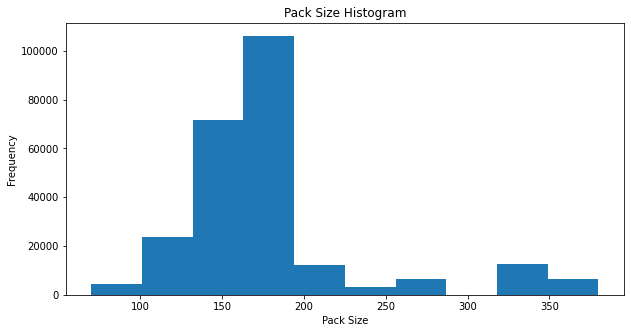

In [ ]:
# check the distribution of product_size

plt.figure(figsize = (10, 5))
plt.hist(merged_data['SIZE'])     
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Pack Size Histogram')

most frequent transaction involves the sizes betweem 150g and 200g

##customer data

In [ ]:
merged_data['LYLTY_CARD_NBR'].nunique()

71288

In [ ]:
customerinfo = pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
customerinfo.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
len(customerinfo)

72637

In [ ]:
customerinfo['LYLTY_CARD_NBR'].nunique()

72637

loyalty card number is unique to each customer

In [ ]:
##lifestages

customerinfo['LIFESTAGE'].nunique()

7

In [ ]:
customerinfo['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
customerinfo['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

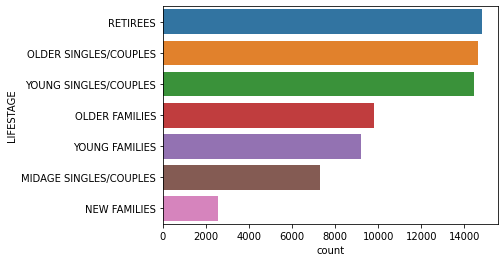

In [ ]:
sns.countplot(y = customerinfo['LIFESTAGE'], order = customerinfo['LIFESTAGE'].value_counts().index)

In [ ]:
# Value counts for each premium customer category

customerinfo['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0, 0.5, 'Premium Customer')

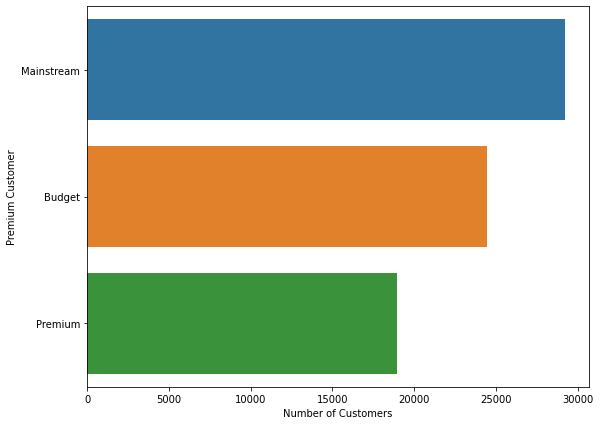

In [ ]:
plt.figure(figsize = (9, 7))
sns.countplot(y = customerinfo['PREMIUM_CUSTOMER'], order = customerinfo['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customer')

In [ ]:
# Total sales by PREMIUM_CUSTOMER and LIFESTAGE

sales = pd.DataFrame(merged_data.groupby(['PREMIUM CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            156863.75
Mainstream       YOUNG SINGLES/COUPLES     147582.20
                 RETIREES                  145168.95
Budget           YOUNG FAMILIES            129717.95
                 OLDER SINGLES/COUPLES     127833.60
Mainstream       OLDER SINGLES/COUPLES     124648.50
Premium          OLDER SINGLES/COUPLES     123537.55
Budget           RETIREES                  105916.30
Mainstream       OLDER FAMILIES             96413.55
Premium          RETIREES                   91296.65
Mainstream       YOUNG FAMILIES             86338.25
                 MIDAGE SINGLES/COUPLES     84734.25
Premium          YOUNG FAMILIES             78571.70
                 OLDER FAMILIES             76542.60
Budget           YOUNG SINGLES/COUPLES      57122.10
Premium          MIDAGE SINGLES/COUPLES     54443.85
                 YOUNG SINGLES/COUPLES      39052.30
Budget           MIDAGE SINGLES/COUPLES     33345.70
                 NEW FAMILIES               20607.45
Mainstream       NEW FAMILIES               15979.70
Premium          NEW FAMILIES               10760.80

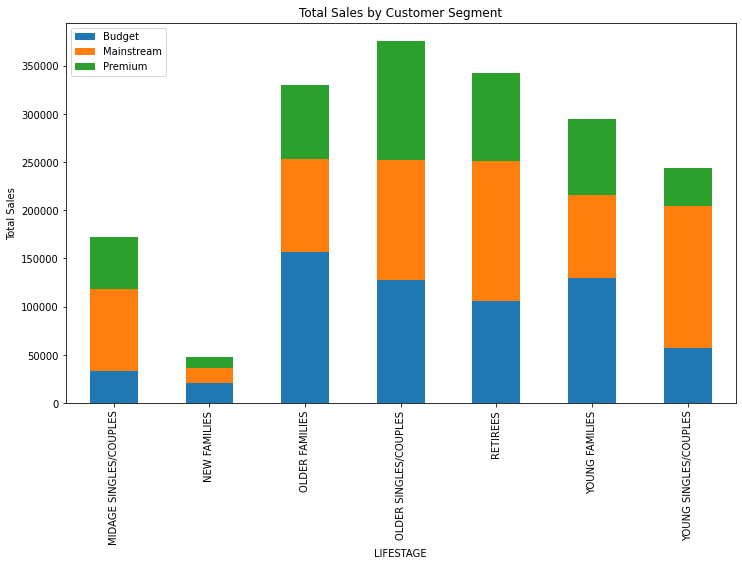

In [ ]:
# Visualise

salesPlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


The top 3 sales  by category of customers comes from BUDGET older families , MAINSTREAM young single couples and PREMIUM older single/couples


In [ ]:
# Number of customers by PREMIUM_CUSTOMER and LIFESTAGE

customers = pd.DataFrame(merged_data.groupby(['PREMIUM CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358
                 OLDER SINGLES/COUPLES                 4858
Budget           OLDER SINGLES/COUPLES                 4849
Premium          OLDER SINGLES/COUPLES                 4682
Budget           OLDER FAMILIES                        4611
                 RETIREES                              4385
                 YOUNG FAMILIES                        3953
Premium          RETIREES                              3812
Budget           YOUNG SINGLES/COUPLES                 3647

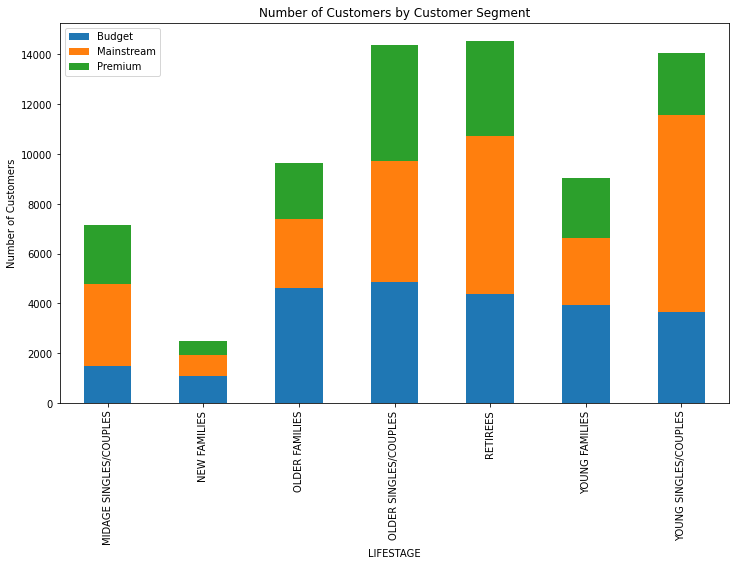

In [ ]:
# Visualise

customersPlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more mainstream young single/couples and retirees.

In [ ]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = merged_data.groupby(['PREMIUM CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / merged_data.groupby(['PREMIUM CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.069444
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


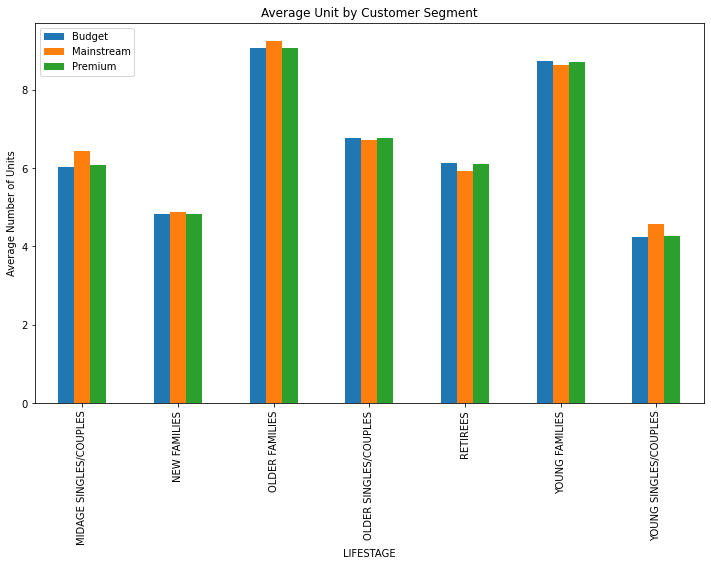

In [ ]:
# Visualise 

avgUnitsPlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM CUSTOMER']).PROD_QTY.sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

older families and youn families buy more chips per customer